# Análisis de Datos con Python

# Análisis de Ventas: Walmart Sales
Objetivo
Responder las siguientes preguntas usando análisis de datos y visualización:

* ¿La fecha o temporada se relaciona con las ventas?
* ¿Hay algún efecto en las ventas durante las fechas festivas?
* ¿Existe relación entre las ventas y la temperatura, precio del combustible, CPI y tasa de desempleo?
* ¿Hay alguna tienda con algún comportamiento relevante (baja en las ventas o viceversa)?

En este curso, aprenderemos a realizar un análisis de datos en Python, utilizando herramientas y bibliotecas específicas para procesar, explorar y visualizar datos de ventas.

## Objetivo Principal
El objetivo es identificar relaciones entre las ventas y las variables proporcionadas, con el fin de obtener insights valiosos que apoyen la toma de decisiones estratégicas y operativas. Este análisis permitirá detectar patrones, tendencias y posibles áreas de mejora en los datos de ventas.

# Importacion de Librerias a usar en el desarrollo

In [32]:
# Librerias
import pandas as pd # Manipulacion de datos
import numpy as np # Operaciones numericas
import kagglehub # Descargar datos de kaggle
import matplotlib.pyplot as plt
import seaborn as sns




# Obtencion de la data desde kaggle


In [4]:
#Descarga de data
path = kagglehub.dataset_download("mikhail1681/walmart-sales")
print("Ruta del dataset:", path)


Ruta del dataset: /root/.cache/kagglehub/datasets/mikhail1681/walmart-sales/versions/2


In [6]:
# Cargamos datos
datos = pd.read_csv(path + '/Walmart_Sales.csv')
print(datos)

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
0         1  05-02-2010  1,643,690.90             0        42.31        2.57   
1         1  12-02-2010  1,641,957.44             1        38.51        2.55   
2         1  19-02-2010  1,611,968.17             0        39.93        2.51   
3         1  26-02-2010  1,409,727.59             0        46.63        2.56   
4         1  05-03-2010  1,554,806.68             0        46.50        2.62   
...     ...         ...           ...           ...          ...         ...   
6430     45  28-09-2012    713,173.95             0        64.88        4.00   
6431     45  05-10-2012    733,455.07             0        64.89        3.98   
6432     45  12-10-2012    734,464.36             0        54.47        4.00   
6433     45  19-10-2012    718,125.53             0        56.47        3.97   
6434     45  26-10-2012    760,281.43             0        58.85        3.88   

        CPI  Unemployment  
0    211.10

# Limpieza y exploracion de datos

In [7]:
# Numero de columnas, registros, nulos y tipo de datos
datos.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
# Establecemos el formato de los resultados numericos de tipo float
pd.set_option('display.float_format', '{:,.2f}'.format) #Indica que el número se mostrará con 2 decimales (por ejemplo, 1234.56)

In [10]:
# Revisamos primeros 5 registros del dataframe
datos.head(5)

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,"1,643,690.90",0,42.31,2.57,211.10,8.11
1,1,12-02-2010,"1,641,957.44",1,38.51,2.55,211.24,8.11
2,1,19-02-2010,"1,611,968.17",0,39.93,2.51,211.29,8.11
3,1,26-02-2010,"1,409,727.59",0,46.63,2.56,211.32,8.11
4,1,05-03-2010,"1,554,806.68",0,46.50,2.62,211.35,8.11


In [12]:
# Convertimos Date a variable de fecha ya que esta como object
datos['Date'] = pd.to_datetime(datos['Date'],format="%d-%m-%Y")
# verificamos que se hizo el cambio de  variable
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 402.3 KB


# Exploración de datos
Como buenos analistas de datos, **algunas preguntas** que quisieramos contestar son las siguientes:

1. ¿La fecha o temporada se relaciona con las ventas?
2. ¿Hay algún efecto en las ventas durante las fechas festivas?
3. ¿Existe relación entre las ventas y la temperatura, precio del combustible, CPI y tasa de desempleo?
4. ¿Hay alguna tienda (store) con algún comportamiento relevante (baja en las ventas o viceversa)?

### ¿La fecha o temporada se relaciona con las ventas?

In [23]:
# Ventas mensuales totales agregamos
datos['fecha_mes'] = datos['Date'].dt.to_period('M').astype(str)
# Agrupamos ventas por fecha mes
ventas_mensuales = datos.groupby('fecha_mes')['Weekly_Sales'].sum().reset_index()

#Cambiamos el nombre de la columna
ventas_mensuales = ventas_mensuales.rename(columns={'Weekly_Sales':'ventas'})

# Como las ventas totales son muy elevadas, convertimos los totales a ventas en millones
ventas_mensuales['ventas_millones'] = np.round(ventas_mensuales['ventas']/1000000,2)

In [28]:
ventas_mensuales.head()

,fecha_mes,ventas,ventas_millones
0,2010-02,"190,332,983.04",190.33
1,2010-03,"181,919,802.50",181.92
2,2010-04,"231,412,368.05",231.41
3,2010-05,"186,710,934.34",186.71
4,2010-06,"192,246,172.36",192.25


## Haremos la grafica del total de las ventas con respecto a los meses para ver las tendencias.

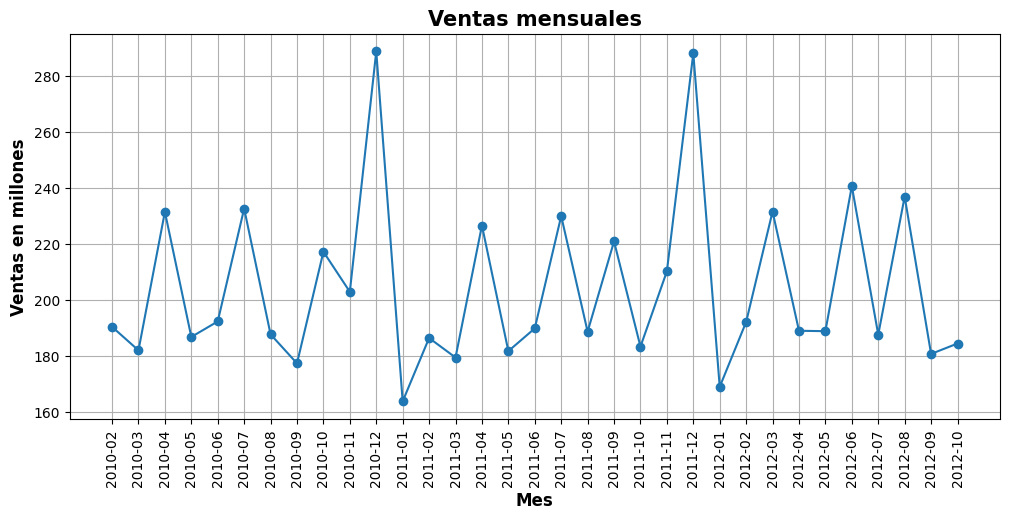

In [26]:
# Graficar las ventas mensuales
plt.figure(figsize=(12, 5))# tamaño de la grafica
plt.plot(ventas_mensuales['fecha_mes'], ventas_mensuales['ventas_millones'], marker='o', label='Ventas mensuales')# variables a graficar
plt.xticks(rotation=90)  # Rotar etiquetas en el eje x
plt.title('Ventas mensuales', fontsize=15,fontweight='bold') # Insetar titulo en negritas
plt.xlabel('Mes', fontsize=12,fontweight='bold') # Titulo eje x en negritas
plt.ylabel('Ventas en millones', fontsize=12,fontweight='bold') # Titulo eje y en negritas
plt.grid(True) # Lineas guia
plt.show()

## ¿Hay algún efecto en las ventas durante las fechas festivas?

In [40]:
# Ventas promedio
holiday_mean_sales = datos[datos['Holiday_Flag']==1]['Weekly_Sales'].mean()
notHoliday_mean_sales = datos[datos['Holiday_Flag']==0]['Weekly_Sales'].mean()
print('Ventas promedio durante dias festivos:',round(holiday_mean_sales))
print('Ventas promedio durante dias sin festividad:',round(notHoliday_mean_sales))
print('En promedio, las ventas en dias festivos son un', round(holiday_mean_sales/notHoliday_mean_sales - 1,2),'mayores')

Ventas promedio durante dias festivos: 1122888
Ventas promedio durante dias sin festividad: 1041256
En promedio, las ventas en dias festivos son un 0.08 mayores


## ¿Existe relación entre las ventas y la temperatura, precio del combustible, CPI y tasa de desempleo?

In [31]:
variables = ['Weekly_Sales','Temperature','Fuel_Price','CPI','Unemployment']
datos[variables].corr()

,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment
Weekly_Sales,1.00,-0.06,0.01,-0.07,-0.11
Temperature,-0.06,1.00,0.14,0.18,0.10
Fuel_Price,0.01,0.14,1.00,-0.17,-0.03
CPI,-0.07,0.18,-0.17,1.00,-0.30
Unemployment,-0.11,0.10,-0.03,-0.30,1.00


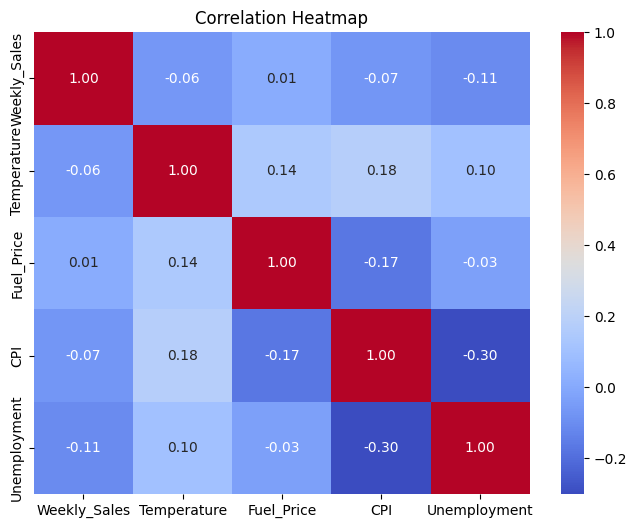

In [37]:
# Matriz de correlacion
matriz_cor = datos[variables].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_cor, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [43]:
# Segmentamos variables y analizamos ventas promedio
datos['cat_Unemployment'] = pd.qcut(datos['Unemployment'],10)
datos.groupby('cat_Unemployment',observed=False)['Weekly_Sales'].mean().reset_index()

,cat_Unemployment,Weekly_Sales
0,"(3.878, 6.061]","1,153,126.83"
1,"(6.061, 6.623]","856,490.67"
2,"(6.623, 7.139]","1,109,046.00"
3,"(7.139, 7.545]","1,167,299.22"
4,"(7.545, 7.874]","1,104,074.79"
5,"(7.874, 8.185]","1,162,252.86"
6,"(8.185, 8.476]","1,059,020.31"
7,"(8.476, 8.876]","1,108,731.28"
8,"(8.876, 9.863]","920,337.37"
9,"(9.863, 14.313]","835,657.58"


## ¿Hay alguna tienda (store) con algún comportamiento relevante (bajón en ventas o viceversa)?

In [44]:
# Numero de tiendas
numTiendas = datos['Store'].nunique()
print('Existen',numTiendas,'distintas')

Existen 45 distintas


In [46]:
# Filtramos datos ventas 2011 y 2012
ventas2011 = datos[(datos['Date'] >= '20110101') & (datos['Date'] <= '20111031')]
ventas2012 = datos[(datos['Date'] >= '20120101') & (datos['Date'] <= '20121031')]
ventas2012.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,fecha_mes,cat_Unemployment
100,1,2012-01-06,"1,550,369.92",0,49.01,3.16,219.71,7.35,2012-01,"(7.139, 7.545]"
101,1,2012-01-13,"1,459,601.17",0,48.53,3.26,219.89,7.35,2012-01,"(7.139, 7.545]"
102,1,2012-01-20,"1,394,393.84",0,54.11,3.27,219.99,7.35,2012-01,"(7.139, 7.545]"
103,1,2012-01-27,"1,319,325.59",0,54.26,3.29,220.08,7.35,2012-01,"(7.139, 7.545]"
104,1,2012-02-03,"1,636,339.65",0,56.55,3.36,220.17,7.35,2012-02,"(7.139, 7.545]"


In [48]:
# Ventas totales por tienda 2011 y 2012
ventas2011_Store = ventas2011.groupby('Store')['Weekly_Sales'].sum().reset_index()
ventas2011_Store = ventas2011_Store.rename(columns={'Weekly_Sales':'Ventas2011'})

ventas2012_Store = ventas2012.groupby('Store')['Weekly_Sales'].sum().reset_index()
ventas2012_Store = ventas2012_Store.rename(columns={'Weekly_Sales':'Ventas2012'})

ventas2012_Store.head(5)

,Store,Ventas2012
0,1,"68,202,058.02"
1,2,"81,496,695.37"
2,3,"18,024,439.50"
3,4,"92,771,189.24"
4,5,"14,168,838.13"


In [49]:
# Unificamos resultados 2011 y 2012
ventas_Store = pd.merge(ventas2011_Store,ventas2012_Store,on='Store',how='left')

# Calculamos porcentaje de aumento año vs año
ventas_Store['ptg_aumento'] = (ventas_Store['Ventas2012'] - ventas_Store['Ventas2011']) / ventas_Store['Ventas2011']
ventas_Store.head()

,Store,Ventas2011,Ventas2012,ptg_aumento
0,1,"65,024,351.29","68,202,058.02",0.05
1,2,"78,433,649.41","81,496,695.37",0.04
2,3,"16,580,098.11","18,024,439.50",0.09
3,4,"88,214,551.63","92,771,189.24",0.05
4,5,"13,058,039.83","14,168,838.13",0.09


In [50]:
# Top 5 tiendas con mayor aumento en ventas
ventas_Store.sort_values(by='ptg_aumento',ascending=False).head(5)

,Store,Ventas2011,Ventas2012,ptg_aumento
37,38,"16,293,630.30","18,631,073.45",0.14
43,44,"12,719,268.57","14,187,373.72",0.12
38,39,"59,419,916.86","65,885,662.85",0.11
2,3,"16,580,098.11","18,024,439.50",0.09
4,5,"13,058,039.83","14,168,838.13",0.09


In [52]:
# Top 5 tiendas con mayor decremento en ventas
ventas_Store.sort_values(by='ptg_aumento',ascending=True).head(5)

,Store,Ventas2011,Ventas2012,ptg_aumento
35,36,"16,105,178.75","13,286,470.53",-0.18
13,14,"84,694,723.98","77,441,398.26",-0.09
20,21,"31,846,447.79","30,251,886.71",-0.05
26,27,"73,855,571.74","71,920,056.12",-0.03
14,15,"25,264,056.33","24,827,530.71",-0.02


# Conclusiones
* Las ventas tienen variaciones estacionales, con picos durante ciertos meses.
* Las fechas festivas afectan positivamente las ventas (confirmar si hay mayor aumento en temporadas específicas).
* Existe relación entre las ventas y ciertas variables como CPI o desempleo (ver matriz de correlación).
* Algunas tiendas presentan patrones destacados de ventas que podrían investigarse para identificar factores locales.